* __Problem Statement__: The time within the food get delivered is a very important factor for a food delivery platform. This time taken is also responsible for popularity of a food delivery platform. If the delivery time of food is high then this could be a big issue for these platform, this could also led to loss of customers.
* __Aim__: Aim is to based on physical factors(location, weather, vehicle, traffic...) of the surroundings predict the time in which the food gets delivered.

In [10]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading the csv file to pandas DataFrame
data = pd.read_csv('data/finalTrain.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


This data is from some food delivery platform which has features like age of delivery person, locations, traffic, weather conditions, vehicle condition, vehicle type, city ...

In [12]:
# Checking the shape of data
data.shape

(45584, 20)

In [13]:
# more information about shape and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

So we have 19 features and 45584 rows

### Handling Missing values

In [14]:
# columns with missing values
missing_count = data.isna().sum()
missing_count[missing_count > 0]

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64

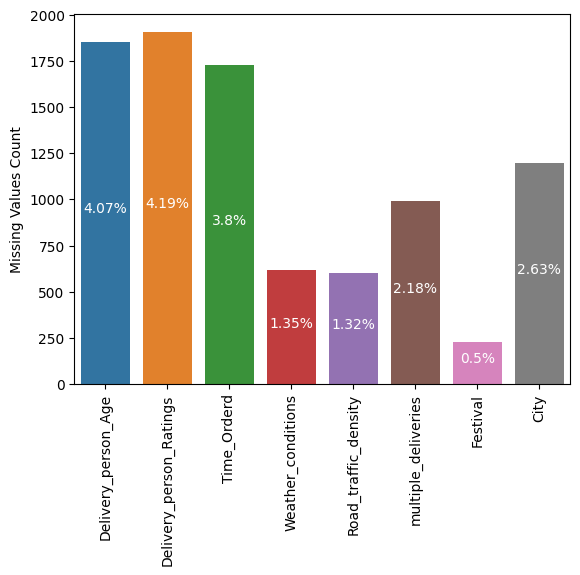

In [15]:
# selecting only columns with missing values more than 0
missing = missing_count[missing_count > 0]
# percentage of missing values
missing_prcnt = (missing/data.shape[0]) * 100

ax = sns.barplot(x = missing.index, y = missing.values)
plt.ylabel('Missing Values Count')

# labeling the all bar with missing number of percentage
for i in range(missing.shape[0]):
    x, y = i, missing[i]/2
    s = str(round(missing_prcnt[i], 2)) + '%'
    ax.text(x, y, s, color = 'white', ha = 'center')

plt.xticks(rotation = 90)
plt.show()

As we can see there are a decent number of missing values in these columns.

In [16]:
# data types of missings columns
missings_cols = data[missing.index]
missings_cols.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Time_Orderd                 object
Weather_conditions          object
Road_traffic_density        object
multiple_deliveries        float64
Festival                    object
City                        object
dtype: object

So here we have two datatypes float and object

In [26]:
# # filling the missing values in numeric columns with median value
missing_numeric_cols = missings_cols.select_dtypes(exclude = 'object').columns
data[missing_numeric_cols] = data[missing_numeric_cols].fillna(value = np.median)

# # filling the missing values in categorical columsn with mode
missing_category_cols = missings_cols.select_dtypes(include = 'object').columns
data[missing_category_cols] = data[missing_category_cols].fillna(value = pd.DataFrame.mode)

In [27]:
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

Handling Categorical Variable

In [29]:
data.select_dtypes('object')

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0xcdcd,DEHRES17DEL01,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,Snack,motorcycle,3.0,No,Metropolitian
1,0xd987,KOCRES16DEL01,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,Meal,motorcycle,1.0,No,Metropolitian
2,0x2784,PUNERES13DEL03,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,Drinks,scooter,1.0,No,Metropolitian
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,Buffet,motorcycle,0.0,No,Metropolitian
4,0xdb64,KNPRES14DEL02,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,Snack,scooter,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,24-03-2022,11:35,11:45,Windy,High,Meal,motorcycle,0.0,No,Metropolitian
45580,0xd641,AGRRES16DEL01,21.0,4.6,16-02-2022,19:55,20:10,Windy,Jam,Buffet,motorcycle,1.0,No,Metropolitian
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,11-03-2022,23:50,24:05:00,Cloudy,Low,Drinks,scooter,0.0,No,Metropolitian
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,07-03-2022,13:35,13:40,Cloudy,High,Snack,motorcycle,1.0,No,Metropolitian


In [32]:
data.Delivery_person_Age.unique()

array([36.0, 21.0, 23.0, 34.0, 24.0, 29.0, 35.0, 33.0, 25.0, 31.0, 37.0,
       27.0, 32.0, 26.0, 38.0, 20.0, 22.0,
       <function median at 0x7fe9e83f6e50>, 28.0, 39.0, 30.0, 15.0, 50.0],
      dtype=object)

In [33]:
from sklearn.impute import SimpleImputer

In [ ]:
SimpleImputer().